In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json

In [2]:
main_dir = 'D:/Competitions/datastorm-2021/'


In [3]:
data_dir = main_dir+'data/feature/'
train_file = data_dir+'cba_train.csv'
val_file = data_dir+'cba_validation.csv'
test_file = data_dir+'cba_test.csv'
NN_dir = main_dir+'src/scripts/NeuralNet/'

In [4]:
train_ds = pd.read_csv(train_file)
val_ds = pd.read_csv(val_file)


In [5]:
def start_category_from_zero(df,columns):
    for each in columns:
        df[each] = df[each] - 1

    return df

In [6]:
start_category_from_zero(train_ds,['Reservation_Status'])
start_category_from_zero(val_ds,['Reservation_Status'])

,Gender,Age,Ethnicity,Educational_Level,Income,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Required_Car_Parking,Use_Promotion,Room_Rate,month_Expected_checkin,dayofweek_Expected_checkin,stay,booking_to_checkin,total_participants,Reservation_Status
0,-0.003235,56,-0.017315,-0.001419,0.007453,0.145374,0.010791,0.003794,0.022095,-0.014993,0.004285,192,8,2,2,195,4,2
1,-0.003235,60,0.010376,-0.003171,0.012407,0.622649,-0.021917,0.003794,0.022095,0.005952,-0.013100,187,8,2,4,175,4,1
2,0.002971,58,-0.009340,-0.003171,0.007453,0.622649,0.010791,0.003794,0.022095,-0.014993,0.004285,227,9,3,1,193,4,1
3,0.002971,23,0.010376,-0.003171,0.012407,0.622649,-0.021917,0.003794,-0.069188,-0.014993,0.004285,189,8,2,2,103,3,0
4,0.002971,47,-0.009340,-0.003171,0.012407,0.145374,-0.021917,0.003794,0.022095,0.005952,0.004285,218,8,2,1,92,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,0.002971,22,-0.017315,-0.003171,-0.012088,-0.444474,-0.021917,0.003794,-0.069188,-0.014993,0.004285,199,11,4,3,37,7,0
2745,0.002971,35,-0.017315,-0.003171,0.012407,0.622649,0.010791,0.003794,0.025248,0.005952,0.004285,106,12,4,1,154,5,1
2746,-0.003235,18,-0.009340,-0.001419,0.012407,0.622649,0.010791,0.003794,-0.069188,-0.014993,0.004285,136,11,4,2,30,5,2
2747,-0.003235,42,-0.009340,-0.003171,0.007453,0.145374,-0.021917,-0.030540,0.022095,0.005952,0.004285,226,11,4,1,170,6,0


In [7]:
print(train_ds['Reservation_Status'].value_counts())
train_ds.dtypes

0    21240
1     4134
2     2125
Name: Reservation_Status, dtype: int64


Gender                        float64
Age                             int64
Ethnicity                     float64
Educational_Level             float64
Income                        float64
Meal_Type                     float64
Visted_Previously             float64
Previous_Cancellations        float64
Deposit_type                  float64
Required_Car_Parking          float64
Use_Promotion                 float64
Room_Rate                       int64
month_Expected_checkin          int64
dayofweek_Expected_checkin      int64
stay                            int64
booking_to_checkin              int64
total_participants              int64
Reservation_Status              int64
dtype: object

In [8]:
x_columns = [x for x in train_ds.columns if x != 'Reservation_Status']
y_columns = ['Reservation_Status']
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)
batch_size = 64
input_shape = (len(x_columns))
epochs = 150
print(input_shape)

17


In [9]:
x_columns

['Gender',
 'Age',
 'Ethnicity',
 'Educational_Level',
 'Income',
 'Meal_Type',
 'Visted_Previously',
 'Previous_Cancellations',
 'Deposit_type',
 'Required_Car_Parking',
 'Use_Promotion',
 'Room_Rate',
 'month_Expected_checkin',
 'dayofweek_Expected_checkin',
 'stay',
 'booking_to_checkin',
 'total_participants']

In [10]:
x_train = np.asarray(train_ds[x_columns])
y_train = np.asarray(train_ds[y_columns])
x_val = np.asarray(val_ds[x_columns])
y_val = np.asarray(val_ds[y_columns])

In [11]:
x_train.shape

(27499, 17)

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(180,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(150,activation='tanh'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3,activation='softmax'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 17)                68        
_________________________________________________________________
dense (Dense)                (None, 100)               1800      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 180)               36180     
_________________________________________________________________
batch_normalization_3 (Batch (None, 180)               7

In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_val,y_val))

Epoch 1/150
430/430 [==============================] - 2s 4ms/step - loss: 0.7653 - accuracy: 0.7192 - val_loss: 1.0764 - val_accuracy: 0.5784
Epoch 2/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.7672 - val_loss: 1.0599 - val_accuracy: 0.5838
Epoch 3/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6760 - accuracy: 0.7716 - val_loss: 1.0417 - val_accuracy: 0.5795
Epoch 4/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.7717 - val_loss: 1.0397 - val_accuracy: 0.5831
Epoch 5/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6641 - accuracy: 0.7718 - val_loss: 1.0612 - val_accuracy: 0.5849
Epoch 6/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6611 - accuracy: 0.7723 - val_loss: 1.0433 - val_accuracy: 0.5857
Epoch 7/150
430/430 [==============================] - 1s 3ms/step - loss: 0.6597 - accuracy: 0.7721 - val_loss: 1.0534 - val_accuracy: 0.5857

In [16]:
prediction_val = model.predict(x_val)
prediction_train  = model.predict(x_train)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
def func(x):
    return x.argmax()
prediction_train = np.apply_along_axis(func, 1, prediction_train)
prediction_val = np.apply_along_axis(func, 1, prediction_val)

In [19]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [20]:
stats =  {
    'train' : {
        'accuracy' : accuracy_score(y_train, prediction_train),
        'precision' : precision_score(y_train,prediction_train, average='macro'),
        'recall' : recall_score(y_train, prediction_train, average='macro'),
        'f1-score' : f1_score(y_train, prediction_train, average='macro')},
    'test' : {
        'accuracy' : accuracy_score(y_val, prediction_val),
        'precision' : precision_score(y_val, prediction_val, average='macro'),
        'recall' : recall_score(y_val, prediction_val, average='macro'),
        'f1-score' : f1_score(y_val, prediction_val, average='macro')
    }
}

In [21]:
print(stats)
with open(NN_dir+'score_BEFOREencode.json','w+') as pf:
    json.dump(stats, pf)

{'train': {'accuracy': 0.9361794974362704, 'precision': 0.9196613733853743, 'recall': 0.848770350508438, 'f1-score': 0.8807388692812093}, 'test': {'accuracy': 0.5201891596944344, 'precision': 0.32668928468015335, 'recall': 0.331695243161039, 'f1-score': 0.3096888630844535}}


In [22]:
import matplotlib.pyplot as plt
def acc_n_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    with open("metrics.json", 'w') as outfile:
        json.dump({"Training-accuracy": acc[-1], "Validation-accuracy": val_acc[-1], "Training-loss": loss[-1],
                   "Validation-loss": val_loss[-1]}, outfile)

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

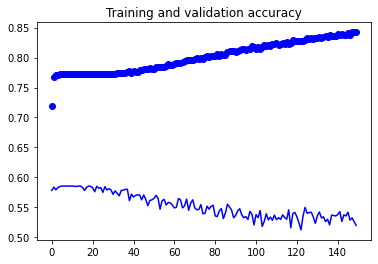

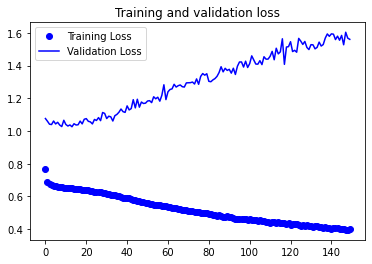

In [23]:
acc_n_loss(history)